In [1]:
import numpy as np
import os

In [2]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [3]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis('off')
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation='nearest')
    plt.axis('off')


In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

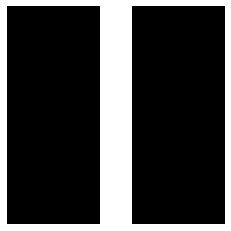

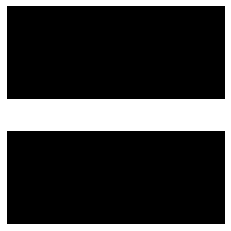

In [6]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [7]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")


In [8]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

In [9]:
import numpy as np
from sklearn.datasets import load_sample_images

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

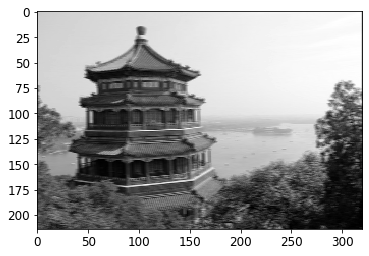

In [10]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

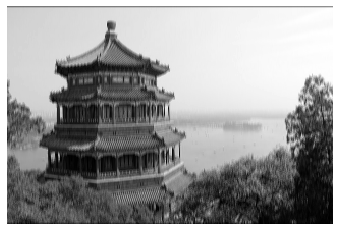

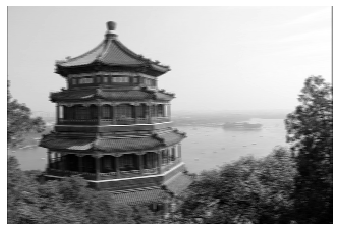

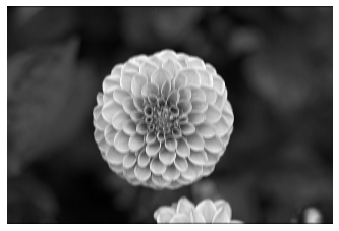

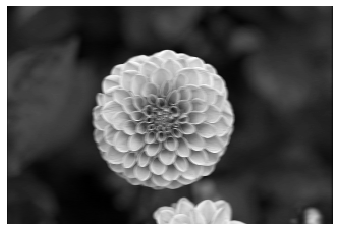

In [11]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()


In [12]:
pip list


Package                            Version                     
---------------------------------- ----------------------------
absl-py                            0.9.0                       
alabaster                          0.7.12                      
anaconda-client                    1.7.2                       
anaconda-navigator                 1.9.7                       
anaconda-project                   0.8.3                       
appnope                            0.1.0                       
appscript                          1.0.1                       
asn1crypto                         1.0.1                       
astor                              0.7.1                       
astroid                            2.3.1                       
astropy                            3.2.2                       
atomicwrites                       1.3.0                       
attrs                              19.2.0                      
Babel                              2.7.0

Note: you may need to restart the kernel to use updated packages.


In [13]:
%pwd

'/Users/home/Desktop/Project/Hands_On_ML'

In [14]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip list

Package                            Version                     
---------------------------------- ----------------------------
absl-py                            0.9.0                       
alabaster                          0.7.12                      
anaconda-client                    1.7.2                       
anaconda-navigator                 1.9.7                       
anaconda-project                   0.8.3                       
appnope                            0.1.0                       
appscript                          1.0.1                       
asn1crypto                         1.0.1                       
astor                              0.7.1                       
astroid                            2.3.1                       
astropy                            3.2.2                       
atomicwrites                       1.3.0                       
attrs                              19.2.0                      
Babel                              2.7.0

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pyspark as s

In [18]:
s.

AttributeError: module 'pyspark' has no attribute 'spark'

In [ ]:
my_range = spark.range(1000).toDF('number')